<a href="https://colab.research.google.com/github/crshao/tensorflow-python-neural-networks/blob/main/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Setup
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Using MINST Fashion Dataset
# includes 60k images for training and 10k for testing

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() #split into testing and training

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape # 60k images 28x28 pixels

(60000, 28, 28)

In [4]:
train_images[0, 23, 23] # one pixel
# our pixel values are between 0 and 255, 0 being black and 255 being white

194

In [5]:
train_labels[:10] # first 10 training labels
# our labels are integers ranging from 0-9. Each integer represents a specific article of clothing.
# We'll create an array of label names to indicate which is which

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

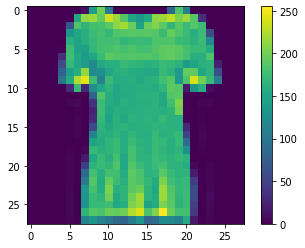

In [7]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
# Data Pre-processing

train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
# Building the model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # input layer(1)
    keras.layers.Dense(128, activation='relu'), # hidden layer(2)
    keras.layers.Dense(10, activation='softmax') # output layer(3)
])

In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Training the model
model.fit(train_images, train_labels, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2319 - accuracy: 0.9138
Epoch 2/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2251 - accuracy: 0.9157
Epoch 3/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2158 - accuracy: 0.9201
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2096 - accuracy: 0.9214
Epoch 5/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2046 - accuracy: 0.9236
Epoch 6/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1977 - accuracy: 0.9260
Epoch 7/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1935 - accuracy: 0.9285
Epoch 8/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1887 - accuracy: 0.9305


In [15]:
# Evaluating the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3622 - accuracy: 0.8864
Test accuracy: 0.8863999843597412


Trouser


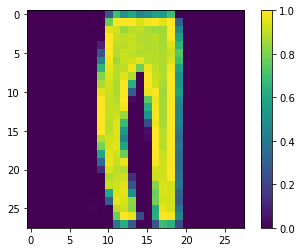

In [25]:
# Making predictions
predictions = model.predict(test_images)
indexx = np.argmax(predictions[2])
print(class_names[indexx])

plt.figure()
plt.imshow(test_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
test_images.shape

(10000, 28, 28)

Pick a number: 47


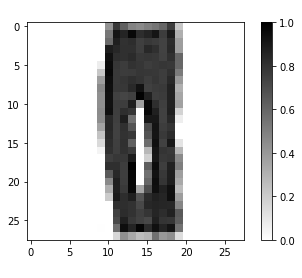

In [30]:
# Verifying Predictions

COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Expected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again..")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
